0.21428571428571427


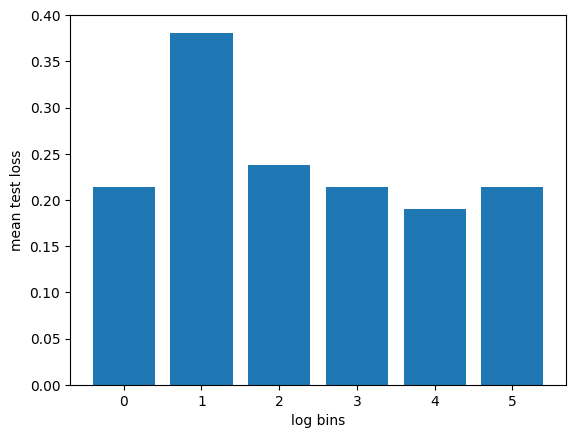

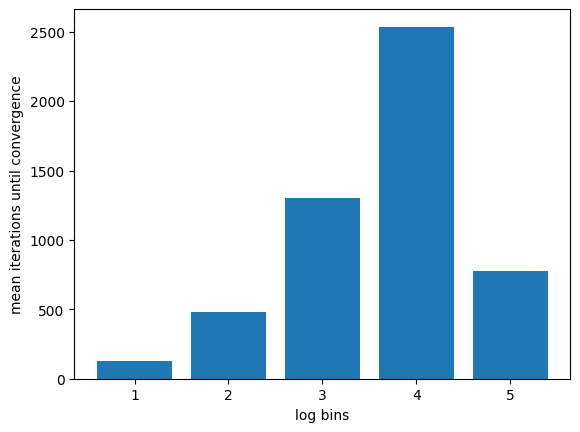

[499]


In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from experiment import experiment
from experiment import test_loss
import random
scaler = MinMaxScaler(feature_range=(-1, 1))
"""
#loading and sorting the data
diabetes_data = pd.read_csv("diabetes.csv").to_numpy()
diabetes_x = diabetes_data[:,:-1]
diabetes_y = diabetes_data[:,-1]
diabetes_y = np.where(diabetes_y == 0,-1, diabetes_y)
# avoid overflow error

diabetes_x = scaler.fit_transform(diabetes_x)
bias = np.ones((diabetes_x.shape[0],1))
diabetes_x = np.hstack((bias,diabetes_x))
"""
#loading sonar data
sonar_data = pd.read_csv("sonar.csv").to_numpy()
sonar_x = sonar_data[:,:-1]
sonar_x = scaler.fit_transform(sonar_x)
#add intercept
bias = np.ones((sonar_data.shape[0],1))
sonar_x = np.hstack((bias, sonar_x)).astype(float)
sonar_y = sonar_data[:,-1]
#convert labels to +1 -1
sonar_y = np.where(sonar_y == "M",1,-1)

bins = [1,2,3,4,5]

normal_iters, quant_iters,  w_quant, w = experiment(sonar_x,sonar_y, bins)
print(normal_iters)

In [9]:
from QuantLog import quantlogistic
from NormalLog import normallogistic

#generate random w to test gradient func on
w_test = np.random.rand(sonar_x.shape[1]) *2 -1

loss, ng = normallogistic(w_test,sonar_x.T,sonar_y.T)
loss, qg1 = quantlogistic(w_test,sonar_x.T,sonar_y.T,1)
loss, qg2 = quantlogistic(w_test,sonar_x.T,sonar_y.T,2)
loss, qg3 = quantlogistic(w_test,sonar_x.T,sonar_y.T,3)
loss, qg4 = quantlogistic(w_test,sonar_x.T,sonar_y.T,4)
loss, qg5 = quantlogistic(w_test,sonar_x.T,sonar_y.T,5)

grads = (qg1,qg2,qg3,qg4,qg5)

gradients = np.hstack((ng,qg1,qg2,qg3,qg4,qg5))
print(gradients)

# the left col is the actual gradient, the 3 to the right are the gradients for 2,4,and 8 quantization levels 
# according to the scheme in QuantLog.py

[[ 0.33593872 -0.03362093  0.27747093  0.32274889  0.33338285  0.33524534]
 [-0.28126961 -0.02254619 -0.24238321 -0.27204968 -0.27843807 -0.28075633]
 [-0.28479685 -0.00757732 -0.24350637 -0.27530877 -0.2820793  -0.28411082]
 [-0.28077999  0.0017672  -0.23797702 -0.26961219 -0.27791436 -0.2799477 ]
 [-0.29417357  0.00055422 -0.25016303 -0.28294322 -0.29149349 -0.29358444]
 [-0.25298725 -0.00734834 -0.2156994  -0.24340859 -0.25032932 -0.25242694]
 [-0.18975582 -0.00286785 -0.16055465 -0.18281105 -0.18781682 -0.18916123]
 [-0.14807057 -0.00612139 -0.12397863 -0.14274284 -0.14629057 -0.14777881]
 [-0.20685483 -0.01879065 -0.17401785 -0.19966866 -0.20425096 -0.20635968]
 [-0.24405831 -0.03653842 -0.209247   -0.23565345 -0.24094939 -0.24370818]
 [-0.22584592 -0.04619171 -0.1979222  -0.22007374 -0.22357643 -0.22566849]
 [-0.2222162  -0.06123206 -0.19849899 -0.21650534 -0.21990999 -0.22176298]
 [-0.18867874 -0.06282738 -0.17391671 -0.1854296  -0.18737546 -0.18813241]
 [-0.14917145 -0.04963946

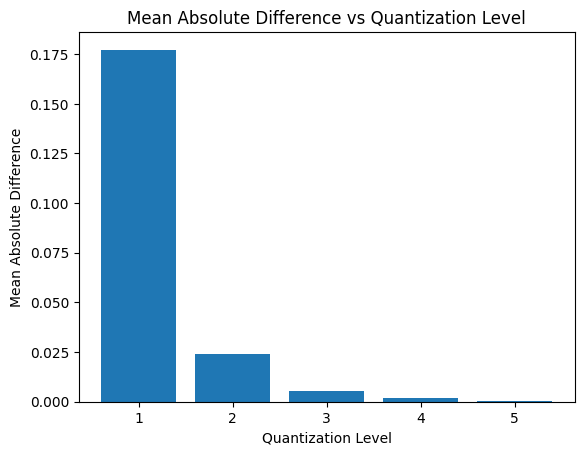

In [10]:
# plot average error of quantization for each feature

import matplotlib.pyplot as plt
quant_lvl = [1,2,3,4,5]
vals = []

for grad in grads:

    vals.append(np.mean(np.abs(ng - grad)))

plt.bar(quant_lvl,vals)
plt.xlabel('Quantization Level')
plt.ylabel('Mean Absolute Difference')
plt.title('Mean Absolute Difference vs Quantization Level')
plt.show()

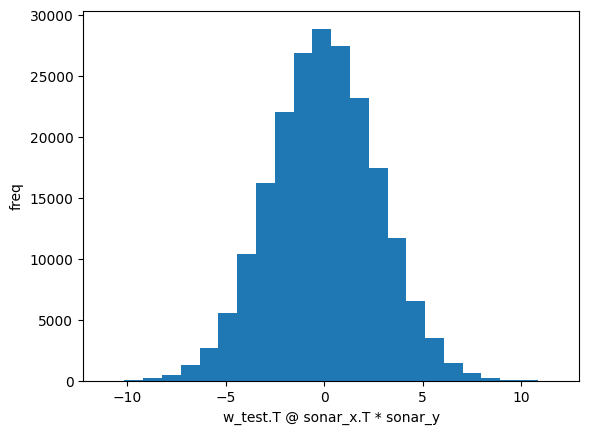

In [11]:
#plot the distribution of vals that were quantized
vals = []
for i in range(1000):
    w_test = np.random.rand(sonar_x.shape[1]) *2 -1
    vals.extend((w_test.T @ sonar_x.T ) * sonar_y)

plt.hist(vals,bins = 24)
plt.xlabel("w_test.T @ sonar_x.T * sonar_y")
plt.ylabel("freq")
plt.show()

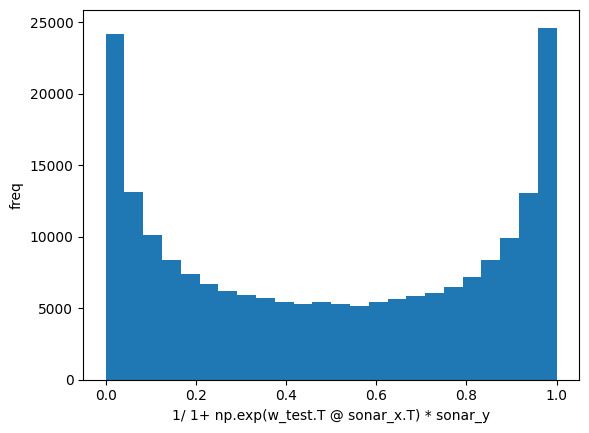

In [12]:
# plot of the gradient function of the values, idk what to call them is highly skewed and I think could result in
# a bad quantization
# although this was just for one random test point so it is not necesarily a good example, but it very much looks
# like you would expect it to
f_vals = []
for i in range(1000):
    w_test = np.random.rand(sonar_x.shape[1]) *2 -1
    vals = (w_test.T @ sonar_x.T) * sonar_y
    f_vals.extend(1/(1+np.exp(vals)))

plt.hist(f_vals,bins = 24)
plt.xlabel("1/ 1+ np.exp(w_test.T @ sonar_x.T) * sonar_y")
plt.ylabel("freq")
plt.show()

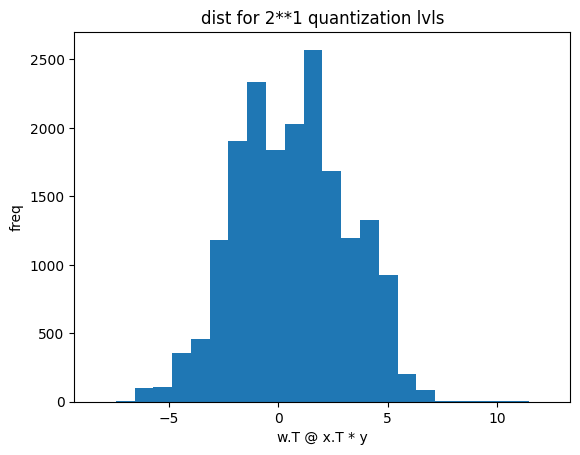

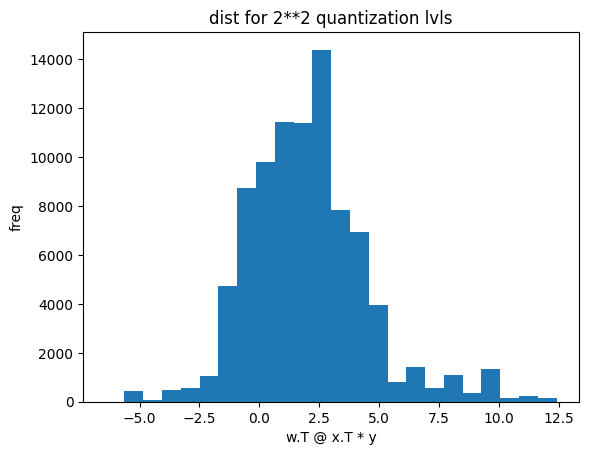

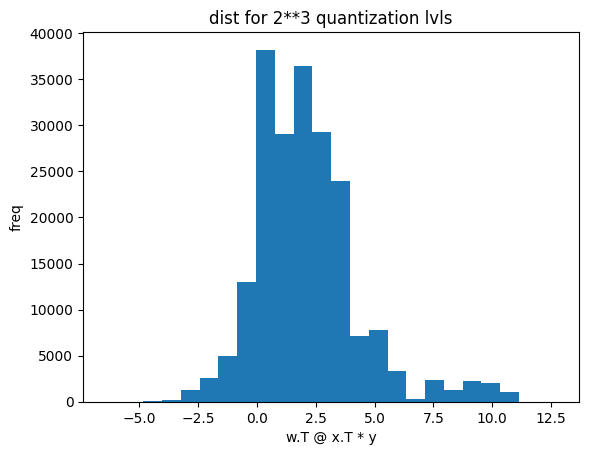

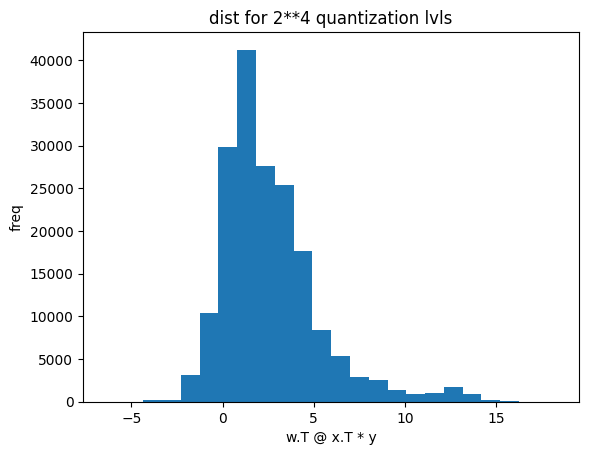

In [22]:
import numpy as np
import matplotlib.pyplot as plt
"""for i in range(1,5):
    data = np.genfromtxt(f'values{i}.csv', delimiter=',')
    plt.hist(data, bins = 24)
    plt.xlabel("w.T @ x.T * y")
    plt.ylabel("freq")
    plt.title(f"dist for 2**{i} quantization lvls")
    plt.show()"""
for i in range(1, 5):
    
    data = np.genfromtxt(f'values{i}.csv', delimiter=',').flatten() #need to flatten or else will look funny

    plt.figure()

    plt.hist(data, bins = 24)

    plt.xlabel("w.T @ x.T * y")
    plt.ylabel("freq")
    plt.title(f"dist for 2**{i} quantization lvls")